<a href="https://colab.research.google.com/github/rahul13289/cs_worker_safety_ppoRLModel/blob/main/ppo_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL algorithm - installation of required packages

In [1]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 19.5 MB/s eta 0:00:00


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 25.2 MB/s eta 0:00:00


In [3]:
!pip install 'shimmy>=2.0'  # Install the shimmy package

In [4]:
import os
import gym
import torch
import numpy as np
from stable_baselines3 import PPO
from ultralytics import YOLO  # Assuming you are using YOLOv8
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [31]:
from IPython.display import Image

# Unfine-tuned YOLO model

In [5]:
# Step 1: Load YOLO model for object detection
model_path = "/content/yolov8n.pt"  # Replace with the actual path
yolo_model = YOLO(model_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 6.25M/6.25M [00:00<00:00, 117MB/s]


In [6]:
# Step 1: Load YOLO model for object detection
yolo_model = YOLO("yolov8n.pt")  # You can replace this with your custom YOLO model

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip '/content/drive/MyDrive/siteSafe.zip'

Streaming output truncated to the last 5000 lines.
  inflating: archive/css-data/train/images/IMG_3100_mp4-25_jpg.rf.0a21e9e91348b61c6c1483d6884d2135.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3313bb2b19a7aa3a0af745abe858ec8e.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3bbcfef23f20b2cf747256793dcfc615.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-25_jpg.rf.6cee1b67a21808fad2318593379f9986.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-25_jpg.rf.ddd7840e3d846cddfcc13d99f4a6999b.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-2_jpg.rf.4d46f38425296af74814d1f0506575b4.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-2_jpg.rf.58de1db8826e4221df63fd980b823844.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-2_jpg.rf.87e69eb0f5f24cbadcca3fbfe8ca029c.jpg  
  inflating: archive/css-data/train/images/IMG_3100_mp4-2_jpg.rf.bde377ae23066dfe925f09789c2bbdef.jpg  
  inflat

In [9]:
# Directories for datasets
data_dirs = {
    "train": "/content/archive/css-data/train/images",
    "test": "/content/archive/css-data/test/images",
    "valid": "/content/archive/css-data/valid/images",
}

In [10]:
import os
import shutil

# Fix dataset structure by ensuring class subfolders exist
def fix_dataset_structure(data_dir):
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"The directory {data_dir} does not exist.")
    classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    if not classes:
        print(f"Fixing dataset structure in {data_dir}.")
        os.makedirs(os.path.join(data_dir, "class1"), exist_ok=True)
        os.makedirs(os.path.join(data_dir, "class2"), exist_ok=True)
        # Move images into class1 or class2 folders for testing purposes
        images = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))]
        for i, img in enumerate(images):
            target_class = "class1" if i % 2 == 0 else "class2"
            shutil.move(os.path.join(data_dir, img), os.path.join(data_dir, target_class, img))
    else:
        print(f"Found classes in {data_dir}: {classes}")

# Apply the fix to all dataset directories
for key, path in data_dirs.items():
    try:
        fix_dataset_structure(path)
    except FileNotFoundError as e:
        print(f"Error with {key} dataset: {e}")

Fixing dataset structure in /content/archive/css-data/train/images.
Fixing dataset structure in /content/archive/css-data/test/images.
Fixing dataset structure in /content/archive/css-data/valid/images.


In [11]:
# Verify dataset structure
def check_dataset_structure(data_dir):
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"The directory {data_dir} does not exist.")
    classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    if not classes:
        raise FileNotFoundError(f"Couldn't find any class folder in {data_dir}. Ensure the directory contains subfolders for each class.")
    print(f"Found classes in {data_dir}: {classes}")

In [12]:
# Check dataset directories
for key, path in data_dirs.items():
    try:
        check_dataset_structure(path)
    except FileNotFoundError as e:
        print(f"Error with {key} dataset: {e}")

Found classes in /content/archive/css-data/train/images: ['class1', 'class2']
Found classes in /content/archive/css-data/test/images: ['class1', 'class2']
Found classes in /content/archive/css-data/valid/images: ['class1', 'class2']


In [13]:
# Step 2: Preprocess the dataset
def load_data(data_dir):
    transform = transforms.Compose([
        transforms.Resize((640, 640)),  # Resize images to YOLO input size
        transforms.ToTensor(),
    ])
    dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    return DataLoader(dataset, batch_size=16, shuffle=True)

In [14]:
# Attempt to load datasets
try:
    train_loader = load_data(data_dirs["train"])
except FileNotFoundError as e:
    print(f"Train loader error: {e}")

In [15]:
try:
    valid_loader = load_data(data_dirs["valid"])
except FileNotFoundError as e:
    print(f"Validation loader error: {e}")

In [16]:
try:
    test_loader = load_data(data_dirs["test"])
except FileNotFoundError as e:
    print(f"Test loader error: {e}")

In [17]:
# Step 3: RL Environment Definition
class SafetyEnv(gym.Env):
    def __init__(self):
        super(SafetyEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(2)  # 2 actions: Alert or No Alert
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(640, 640, 3), dtype=np.uint8)
        self.current_image = None

    def reset(self):
        # Reset environment and return the first observation
        self.current_image = None  # Reset your environment state here
        return np.zeros((640, 640, 3), dtype=np.uint8)

    def step(self, action):
        # Simulate an action and return the new state, reward, done, and info
        reward = 0
        done = False

        if action == 0:  # No alert
            reward = -1  # Penalize for no action if a risk exists
        elif action == 1:  # Alert
            reward = 1  # Reward for correctly identifying risks

        return np.zeros((640, 640, 3), dtype=np.uint8), reward, done, {}

In [18]:
# Step 4: Train PPO on the Safety Environment
env = SafetyEnv()
ppo_model = PPO("CnnPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [19]:
print("Starting PPO Training...")
ppo_model.learn(total_timesteps=10000)

Starting PPO Training...
-----------------------------
| time/              |      |
|    fps             | 90   |
|    iterations      | 1    |
|    time_elapsed    | 22   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 34           |
|    iterations           | 2            |
|    time_elapsed         | 120          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0037650503 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.692       |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 4.31         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0152      |
|    value_loss           | 8.11         |
----------------------------------

In [20]:
# Step 5: Hybrid Model Integration
def detect_and_act(image_path):
    detections = yolo_model(image_path)

    # Check for specific detections (e.g., workers without helmets)
    risks_detected = False
    for detection in detections.xyxy[0]:  # Bounding box detections
        if detection[-1] == 0:  # Assuming class 0 is "no helmet"
            risks_detected = True

    # Use RL model to decide action
    action, _ = ppo_model.predict(np.zeros((640, 640, 3), dtype=np.uint8))
    if action == 1 and risks_detected:
        print("Alert: Safety risk detected!")
    else:
        print("No action required.")

In [33]:
def detect_and_act(image_path):
    # Perform detection using YOLOv8
    results = yolo_model(image_path)

    # Ensure detections are properly parsed
    detections = results[0]  # Extract the first batch of results
    risks_detected = False

    for detection in detections.boxes:  # Access bounding boxes
        # Get class index and check if it's the "no helmet" class
        class_id = int(detection.cls)
        if class_id == 0:  # Assuming class 0 represents "no helmet"
            risks_detected = True
            print(f"Risk detected: Class {class_id}, Box: {detection.xyxy}")

    # Use RL model to decide action
    action, _ = ppo_model.predict(np.zeros((640, 640, 3), dtype=np.uint8))
    if action == 1 and risks_detected:
        print("Alert: Safety risk detected!")
    else:
        print("No action required.")

In [40]:
image_path = '/content/test3.jpg'
def detect_and_act(image_path):
    # Perform detection using YOLOv8
    results = yolo_model(image_path)

    # Define the required safety equipment classes
    required_classes = {
        0: "hard hat",
        1: "safety glasses",
        2: "vest",
        3: "gloves",
        4: "ear protection",
        5: "fall protection",
        6: "protective clothing",
        7: "respiratory protection"
    }

    # Initialize a dictionary to track detected equipment
    equipment_detected = {class_name: False for class_name in required_classes.values()}

    # Parse YOLO detections
    for detection in results[0].boxes:  # YOLOv8 boxes output
        class_id = int(detection.cls)  # Get the class ID
        if class_id in required_classes:
            equipment_detected[required_classes[class_id]] = True

    # Check if any required equipment is missing
    missing_equipment = [item for item, detected in equipment_detected.items() if not detected]
    if missing_equipment:
        print(f"Alert: Missing safety equipment: {', '.join(missing_equipment)}")
    else:
        print("Worker is equipped with all required safety equipment.")

    # Use RL model to decide action
    action, _ = ppo_model.predict(np.zeros((640, 640, 3), dtype=np.uint8))
    if action == 1 and missing_equipment:
        print("Alert: Safety risk detected!")
    else:
        print("No action required.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
image_path = "/content/test3.jpg"
detect_and_act(image_path)


image 1/1 /content/test3.jpg: 480x640 2 persons, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 21.5ms postprocess per image at shape (1, 3, 480, 640)
Alert: Missing safety equipment: safety glasses, vest, gloves, ear protection, fall protection, protective clothing, respiratory protection
Alert: Safety risk detected!


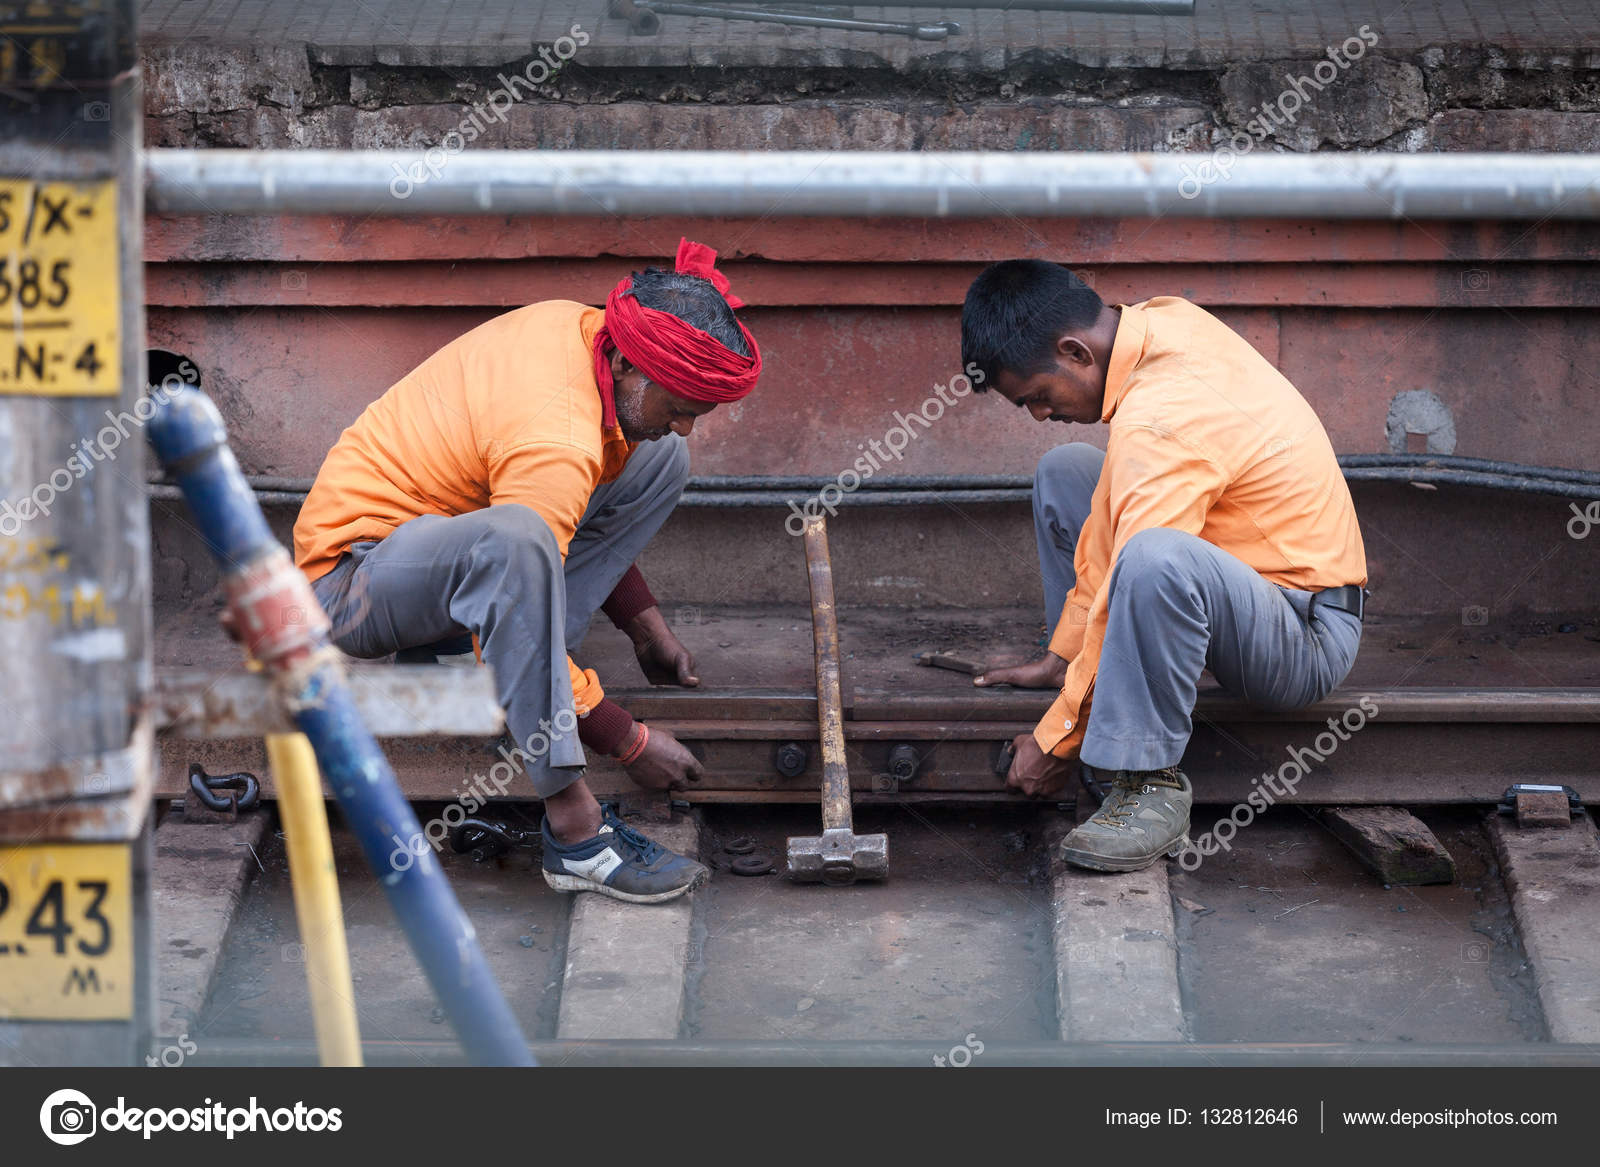

In [42]:
Image('/content/test3.jpg')

# Performance metrics

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(yolo_model, ppo_model, test_loader):
    yolo_correct = 0
    yolo_total = 0
    rl_correct = 0
    rl_total = 0

    # Store predictions and ground truths for YOLO and RL metrics
    yolo_predictions = []
    yolo_ground_truths = []
    rl_predictions = []
    rl_ground_truths = []

    for images, labels in test_loader:
        for i, image in enumerate(images):
            # YOLO Detection
            detections = yolo_model(image)
            detected_classes = [int(d.cls) for d in detections[0].boxes]  # Detected class IDs
            yolo_ground_truth = labels[i].item()  # True class from the test set

            # Check if the ground truth is among detections
            yolo_ground_truths.append(yolo_ground_truth)
            if yolo_ground_truth in detected_classes:
                yolo_predictions.append(yolo_ground_truth)  # True positive
                yolo_correct += 1
            else:
                yolo_predictions.append(-1)  # False negative

            yolo_total += 1

            # RL Decision
            risks_detected = yolo_ground_truth not in detected_classes
            action, _ = ppo_model.predict(np.zeros((640, 640, 3), dtype=np.uint8))  # RL decision
            rl_ground_truth = int(risks_detected)  # 1 if risk exists, else 0
            rl_ground_truths.append(rl_ground_truth)
            rl_predictions.append(action)

            if action == rl_ground_truth:
                rl_correct += 1
            rl_total += 1

    # YOLO Metrics
    yolo_accuracy = accuracy_score(yolo_ground_truths, yolo_predictions)
    yolo_precision = precision_score(yolo_ground_truths, yolo_predictions, average="macro", zero_division=1)
    yolo_recall = recall_score(yolo_ground_truths, yolo_predictions, average="macro", zero_division=1)
    yolo_f1 = f1_score(yolo_ground_truths, yolo_predictions, average="macro", zero_division=1)

    # RL Metrics
    rl_accuracy = accuracy_score(rl_ground_truths, rl_predictions)
    rl_precision = precision_score(rl_ground_truths, rl_predictions, average="binary", zero_division=1)
    rl_recall = recall_score(rl_ground_truths, rl_predictions, average="binary", zero_division=1)
    rl_f1 = f1_score(rl_ground_truths, rl_predictions, average="binary", zero_division=1)

    # Print Metrics
    print(f"YOLO Metrics: Accuracy={yolo_accuracy:.2f}, Precision={yolo_precision:.2f}, Recall={yolo_recall:.2f}, F1 Score={yolo_f1:.2f}")
    print(f"RL Metrics: Accuracy={rl_accuracy:.2f}, Precision={rl_precision:.2f}, Recall={rl_recall:.2f}, F1 Score={rl_f1:.2f}")

    # Confusion Matrix
    print("RL Confusion Matrix:")
    print(confusion_matrix(rl_ground_truths, rl_predictions))

# Example usage:
try:
    evaluate_model(yolo_model, ppo_model, test_loader)
except NameError as e:
    print(f"Test loader error: {e}")


WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 640, 640) is incompatible.
0: 640x640 1 truck, 220.0ms
Speed: 53.2ms preprocess, 220.0ms inference, 115.5ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 640, 640) is incompatible.
0: 640x640 1 giraffe, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 640, 640) is incompatible.
0: 640x640 2 persons, 1 car, 1 truck, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 640, 640) is incompatible.
0: 640x640 1 person, 1 fork, 8.6ms
Speed: 1.3

# CODE REPOSITORY - ONLY FOR LATER CHANGES !!!


In [ ]:
# To increase accuracy of YOLO model - we need to fine tune the model
# Here is a code for that...

from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Load the YOLOv8 nano model

# Train the model on your custom dataset
model.train(data='path_to_data.yaml', epochs=50, batch_size=16, imgsz=640)

# Evaluate the model
metrics = model.val()

# Save the fine-tuned model
model.export(format='onnx')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(predictions, ground_truth):
    accuracy = accuracy_score(ground_truth, predictions)
    precision = precision_score(ground_truth, predictions, average='weighted')
    recall = recall_score(ground_truth, predictions, average='weighted')
    f1 = f1_score(ground_truth, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Example usage:
yolo_preds = [0, 1, 0, 1]  # Replace with YOLO model predictions
yolo_gt = [0, 1, 1, 1]     # Replace with ground truth labels
rl_preds = [0, 1, 1, 1]    # Replace with RL model predictions

# YOLO Metrics
yolo_metrics = evaluate_model(yolo_preds, yolo_gt)
print(f"YOLO Metrics: Accuracy={yolo_metrics[0]}, Precision={yolo_metrics[1]}, Recall={yolo_metrics[2]}, F1 Score={yolo_metrics[3]}")

# RL Metrics
rl_metrics = evaluate_model(rl_preds, yolo_gt)
print(f"RL Metrics: Accuracy={rl_metrics[0]}, Precision={rl_metrics[1]}, Recall={rl_metrics[2]}, F1 Score={rl_metrics[3]}")